In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data as data
import pandas as pd
from tqdm import tqdm

/opt/homebrew/Cellar/jupyterlab/3.2.9/libexec/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### PyTorch provides functions that are stochastic like generating random numbers.
### setup your code to be reproducible with the exact same random numbers. 


In [2]:
torch.manual_seed(42) # Setting the seed


In [3]:
x = torch.rand(5, 3)

In [4]:
print(x)

tensor([[0.8823, 0.9150, 0.3829],
        [0.9593, 0.3904, 0.6009],
        [0.2566, 0.7936, 0.9408],
        [0.1332, 0.9346, 0.5936],
        [0.8694, 0.5677, 0.7411]])


In [5]:
print(x)

tensor([[0.8823, 0.9150, 0.3829],
        [0.9593, 0.3904, 0.6009],
        [0.2566, 0.7936, 0.9408],
        [0.1332, 0.9346, 0.5936],
        [0.8694, 0.5677, 0.7411]])


## lets generate Tensor 


In [6]:
tensor_example = torch.Tensor(2,3,4)

In [7]:
print(tensor_example, tensor_example.shape, tensor_example.size, '\n')


tensor([[[ 2.3694e-38,  2.3694e-38,  2.3694e-38,  1.6283e-27],
         [ 0.0000e+00,  1.0842e-19,  0.0000e+00,  1.0842e-19],
         [ 4.0232e-28,         nan, -7.8863e+25, -4.2921e+02]],

        [[ 0.0000e+00,  1.0842e-19,  0.0000e+00,  2.7551e-40],
         [ 0.0000e+00, -1.2630e-14,  1.0971e-38,  1.4013e-45],
         [ 0.0000e+00,  1.0842e-19,  3.7671e-29,  3.6893e+19]]]) torch.Size([2, 3, 4]) <built-in method size of Tensor object at 0x11f901ea0> 



### Dynamic Computation Graph and Backpropagation


#### Given an input x , we define our function by manipulating that input, usually by matrix-multiplications with weight matrices and additions with so-called bias vectors.  As we manipulate our input, we are automatically creating a computational graph.  This graph shows how to arrive at our output from our input. PyTorch is a define-by-run framework; this means that we can just do our manipulations, and PyTorch will keep track of that graph for us. Thus, we create a dynamic computation graph along the way.

#### Note: Why do we want gradients? Consider that we have defined a function, a neural net, that is supposed to compute a certain output y for an input vector X.  We then define an error measure that tells us how wrong our network is;  how bad it is in predicting output y from input x. Based on this error measure,  we can use the gradients to update the weights W that were responsible for the output,so that the next time we present input x to our network, the output will be closer to what we want.

#### The first thing we have to do is to specify which tensors require gradients. By default, when we create a tensor, it does not require gradients.

In [8]:
grad = torch.ones((3,))

In [9]:
print(grad.requires_grad)

False


#### We can change this for an existing tensor using the function requires_grad_() (underscore indicating that this is a in-place operation). Alternatively, when creating a tensor, you can pass the argument requires_grad=True to most initializers we have seen above.

In [10]:
grad.requires_grad_(True)


tensor([1., 1., 1.], requires_grad=True)

### let say we have function y = mean[(Xi+2)^2 + 3], we want dy/dx for given output x = [0,1,2] now to minimize or maximize  we can use gradient 

<math xmlns="http://www.w3.org/1998/Math/MathML" display="block">
  <mi>y</mi>
  <mo>=</mo>
  <mfrac>
    <mn>1</mn>
    <mrow>
      <mo stretchy="false">|</mo>
      <mi>x</mi>
      <mo stretchy="false">|</mo>
    </mrow>
  </mfrac>
  <munder>
    <mo data-mjx-texclass="OP">&#x2211;</mo>
    <mi>i</mi>
  </munder>
  <mrow data-mjx-texclass="INNER">
    <mo data-mjx-texclass="OPEN">[</mo>
    <mo stretchy="false">(</mo>
    <msub>
      <mi>x</mi>
      <mi>i</mi>
    </msub>
    <mo>+</mo>
    <mn>2</mn>
    <msup>
      <mo stretchy="false">)</mo>
      <mn>2</mn>
    </msup>
    <mo>+</mo>
    <mn>3</mn>
    <mo data-mjx-texclass="CLOSE">]</mo>
  </mrow>
</math>

<math xmlns="http://www.w3.org/1998/Math/MathML">
    <p> You could imagine that x are our parameters, and we want to optimize (either maximize or minimize) the output y </p>
  <mi>&#x2202;</mi>
  <mi>y</mi>
  <mrow data-mjx-texclass="ORD">
    <mo>/</mo>
  </mrow>
  <mi>&#x2202;</mi>
  <mrow data-mjx-texclass="ORD">
    <mi mathvariant="bold">x</mi>
      <p> For this, we want to obtain the gradients . For our example, we’ll use x=[0,1,2] as our input.</p>
  </mrow>
</math>. 


In [11]:
xm = torch.arange(3, dtype = torch.float32, requires_grad=True)  # only float tensor can have gradient

In [12]:
xm

tensor([0., 1., 2.], requires_grad=True)

### computation graph

In [13]:
a = xm + 2
b = a ** 2
c = b + 3
ym = c.mean()
print("Y", ym)

Y tensor(12.6667, grad_fn=<MeanBackward0>)


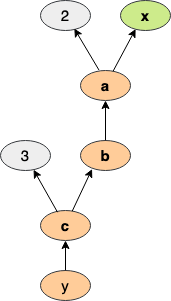

#### We can perform backpropagation on the computation graph by calling the function backward() on the last output, which effectively calculates the gradients for each tensor that has the property requires_grad=True:

In [14]:
ym.backward()

In [15]:
print(xm.grad)

tensor([1.3333, 2.0000, 2.6667])


xm.grad will now contain the gradient <math xmlns="http://www.w3.org/1998/Math/MathML">
  <mi>&#x2202;</mi>
  <mi>y</mi>
  <mrow data-mjx-texclass="ORD">
    <mo>/</mo>
  </mrow>
  <mi>&#x2202;</mi>
  <mrow data-mjx-texclass="ORD">
    <mi data-mjx-variant="-tex-calligraphic" mathvariant="script">x</mi>
  </mrow>
</math>, and this gradient indicates how a change in x will affect output y given the current input :x=[0,1,2]

<math xmlns="http://www.w3.org/1998/Math/MathML" display="block">
  <mfrac>
    <mrow>
      <mi>&#x2202;</mi>
      <mi>y</mi>
    </mrow>
    <mrow>
      <mi>&#x2202;</mi>
      <msub>
        <mi>x</mi>
        <mi>i</mi>
      </msub>
    </mrow>
  </mfrac>
  <mo>=</mo>
  <mfrac>
    <mrow>
      <mi>&#x2202;</mi>
      <mi>y</mi>
    </mrow>
    <mrow>
      <mi>&#x2202;</mi>
      <msub>
        <mi>c</mi>
        <mi>i</mi>
      </msub>
    </mrow>
  </mfrac>
  <mfrac>
    <mrow>
      <mi>&#x2202;</mi>
      <msub>
        <mi>c</mi>
        <mi>i</mi>
      </msub>
    </mrow>
    <mrow>
      <mi>&#x2202;</mi>
      <msub>
        <mi>b</mi>
        <mi>i</mi>
      </msub>
    </mrow>
  </mfrac>
  <mfrac>
    <mrow>
      <mi>&#x2202;</mi>
      <msub>
        <mi>b</mi>
        <mi>i</mi>
      </msub>
    </mrow>
    <mrow>
      <mi>&#x2202;</mi>
      <msub>
        <mi>a</mi>
        <mi>i</mi>
      </msub>
    </mrow>
  </mfrac>
  <mfrac>
    <mrow>
      <mi>&#x2202;</mi>
      <msub>
        <mi>a</mi>
        <mi>i</mi>
      </msub>
    </mrow>
    <mrow>
      <mi>&#x2202;</mi>
      <msub>
        <mi>x</mi>
        <mi>i</mi>
      </msub>
    </mrow>
  </mfrac>
</math>

<math xmlns="http://www.w3.org/1998/Math/MathML" display="block">
  <mfrac>
    <mrow>
      <mi>&#x2202;</mi>
      <msub>
        <mi>a</mi>
        <mi>i</mi>
      </msub>
    </mrow>
    <mrow>
      <mi>&#x2202;</mi>
      <msub>
        <mi>x</mi>
        <mi>i</mi>
      </msub>
    </mrow>
  </mfrac>
  <mo>=</mo>
  <mn>1</mn>
  <mo>,</mo>
  <mspace width="1cm"></mspace>
  <mfrac>
    <mrow>
      <mi>&#x2202;</mi>
      <msub>
        <mi>b</mi>
        <mi>i</mi>
      </msub>
    </mrow>
    <mrow>
      <mi>&#x2202;</mi>
      <msub>
        <mi>a</mi>
        <mi>i</mi>
      </msub>
    </mrow>
  </mfrac>
  <mo>=</mo>
  <mn>2</mn>
  <mo>&#x22C5;</mo>
  <msub>
    <mi>a</mi>
    <mi>i</mi>
  </msub>
  <mspace width="1cm"></mspace>
  <mfrac>
    <mrow>
      <mi>&#x2202;</mi>
      <msub>
        <mi>c</mi>
        <mi>i</mi>
      </msub>
    </mrow>
    <mrow>
      <mi>&#x2202;</mi>
      <msub>
        <mi>b</mi>
        <mi>i</mi>
      </msub>
    </mrow>
  </mfrac>
  <mo>=</mo>
  <mn>1</mn>
  <mspace width="1cm"></mspace>
  <mfrac>
    <mrow>
      <mi>&#x2202;</mi>
      <mi>y</mi>
    </mrow>
    <mrow>
      <mi>&#x2202;</mi>
      <msub>
        <mi>c</mi>
        <mi>i</mi>
      </msub>
    </mrow>
  </mfrac>
  <mo>=</mo>
  <mfrac>
    <mn>1</mn>
    <mn>3</mn>
  </mfrac>
</math>

<math xmlns="http://www.w3.org/1998/Math/MathML">
  <mi>&#x2202;</mi>
  <mi>y</mi>
  <mrow data-mjx-texclass="ORD">
    <mo>/</mo>
  </mrow>
  <mi>&#x2202;</mi>
  <mrow data-mjx-texclass="ORD">
    <mi mathvariant="bold">x</mi>
  </mrow>
  <mo>=</mo>
  <mo stretchy="false">[</mo>
  <mn>4</mn>
  <mrow data-mjx-texclass="ORD">
    <mo>/</mo>
  </mrow>
  <mn>3</mn>
  <mo>,</mo>
  <mn>2</mn>
  <mo>,</mo>
  <mn>8</mn>
  <mrow data-mjx-texclass="ORD">
    <mo>/</mo>
  </mrow>
  <mn>3</mn>
  <mo stretchy="false">]</mo>
</math>

### Simple classifier We can now make use of the pre-defined modules in the torch.nn package, and define our own small neural network. We will use a minimal network with a input layer,  one hidden layer with tanh as activation function, and a output layer.

In [16]:
class SimpleClassifier(nn.Module):
    def __init__(self, num_inputs, num_hidden, num_outputs):
        super().__init__()
        # lets initialize the modules layers
        self.linear1 = nn.Linear(num_inputs, num_hidden)
        self.act_fn = nn.Tanh()
        self.linear2 = nn.Linear(num_hidden, num_outputs)

    def forward(self, x):
        x = self.linear1(x)
        x = self.act_fn(x)
        x = self.linear2(x)

        return x

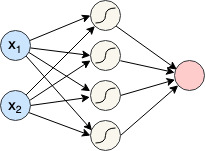

### For the examples in this notebook, we will use a tiny neural network with two input neurons and four hidden neurons. As we perform binary classification, we will use a single output neuron. Note that we do not apply a sigmoid on the output yet. This is because other functions, especially the loss, are more efficient and precise to calculate on the original outputs instead of the sigmoid output. We will discuss the detailed reason later.

In [17]:
model = SimpleClassifier(num_inputs=2, num_hidden=4, num_outputs=1)

In [18]:
print(model)

SimpleClassifier(
  (linear1): Linear(in_features=2, out_features=4, bias=True)
  (act_fn): Tanh()
  (linear2): Linear(in_features=4, out_features=1, bias=True)
)


### Printing the model lists all submodules it contains. The parameters of a module can be obtained by using its parameters() functions, or named_parameters() to get a name to each parameter object. For our small neural network, we have the following parameters:

In [19]:
for name, param in model.named_parameters():
    print(f"Parameter {name}, shape {param.shape}")

Parameter linear1.weight, shape torch.Size([4, 2])
Parameter linear1.bias, shape torch.Size([4])
Parameter linear2.weight, shape torch.Size([1, 4])
Parameter linear2.bias, shape torch.Size([1])


In [20]:
import torch.utils.data as data


In [21]:
class XORDataset(data.Dataset):

    def __init__(self, size, std=0.1):
        """
        Inputs:
            size - Number of data points we want to generate
            std - Standard deviation of the noise (see generate_continuous_xor function)
        """
        super().__init__()
        self.size = size
        self.std = std
        self.generate_continuous_xor()

    def generate_continuous_xor(self):
        # Each data point in the XOR dataset has two variables, x and y, that can be either 0 or 1
        # The label is their XOR combination, i.e. 1 if only x or only y is 1 while the other is 0.
        # If x=y, the label is 0.
        data = torch.randint(low=0, high=2, size=(self.size, 2), dtype=torch.float32)
        label = (data.sum(dim=1) == 1).to(torch.long)
        # To make it slightly more challenging, we add a bit of gaussian noise to the data points.
        data += self.std * torch.randn(data.shape)

        self.data = data
        self.label = label

    def __len__(self):
        # Number of data point we have. Alternatively self.data.shape[0], or self.label.shape[0]
        return self.size

    def __getitem__(self, idx):
        # Return the idx-th data point of the dataset
        # If we have multiple things to return (data point and label), we can return them as tuple
        data_point = self.data[idx]
        data_label = self.label[idx]
        return data_point, data_label

In [22]:
dataset = XORDataset(size=200)
print("Size of dataset:", len(dataset))
print("Data point 0:", dataset[0])

Size of dataset: 200
Data point 0: (tensor([0.9506, 1.1137]), tensor(0))


In [23]:
print(dataset[:][0], dataset[:][1])


tensor([[ 9.5060e-01,  1.1137e+00],
        [ 9.5382e-01,  1.4200e-01],
        [ 1.0849e+00, -4.7891e-03],
        [ 6.6856e-02,  1.0430e-01],
        [ 6.8990e-02, -1.3129e-01],
        [ 1.0038e+00,  8.8298e-01],
        [ 9.8968e-01,  1.1189e+00],
        [ 1.0761e+00, -7.4630e-02],
        [ 8.6161e-01,  1.0487e+00],
        [-1.0020e-01,  1.0033e+00],
        [-4.2920e-02,  9.0182e-01],
        [-6.4206e-02,  1.0827e+00],
        [ 1.1591e+00, -1.2081e-02],
        [-4.8302e-02,  1.1330e-02],
        [ 7.7151e-03, -9.2281e-02],
        [-1.2620e-01,  1.0861e-01],
        [ 1.0966e-01,  9.3163e-01],
        [ 1.0066e+00, -7.7414e-05],
        [ 1.0162e+00,  1.1196e+00],
        [ 8.6938e-01,  8.5960e-01],
        [-1.0597e-01,  1.0306e+00],
        [ 4.1506e-02,  9.2826e-01],
        [ 1.2834e+00,  1.1953e+00],
        [ 2.0487e-01,  8.9120e-01],
        [ 1.6217e-01,  1.0851e+00],
        [-4.0047e-02,  9.3912e-01],
        [-5.0810e-02, -6.1849e-02],
        [ 8.3530e-01, -1.036

In [24]:
print("Size of dataset:", len(dataset))


Size of dataset: 200


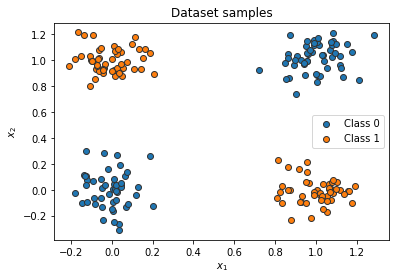

In [25]:
# lets visualize the dataset

def viz_data(data, label):
    if isinstance(data, torch.Tensor):
        data = data.cpu().numpy()
    if isinstance(label, torch.Tensor):
        label = label.cpu().numpy()
    data_0 = data[label == 0]
    data_1 = data[label == 1]

    plt.figure()
    plt.scatter(data_0[:,0], data_0[:,1], edgecolor="#333", label="Class 0")
    plt.scatter(data_1[:,0], data_1[:,1], edgecolor="#333", label="Class 1")
    plt.title("Dataset samples")
    plt.ylabel(r"$x_2$")
    plt.xlabel(r"$x_1$")
    plt.legend()

viz_data(dataset.data, dataset.label)
plt.show()

In [26]:
# dataloader class
data_loader = data.DataLoader(dataset, batch_size=8, shuffle=True)


In [27]:
# next(iter(...)) catches the first batch of the data loader
# If shuffle is True, this will return a different batch every time we run this cell
# For iterating over the whole dataset, we can simple use "for batch in data_loader: ..."
data_inputs, data_labels = next(iter(data_loader))

# The shape of the outputs are [batch_size, d_1,...,d_N] where d_1,...,d_N are the
# dimensions of the data point returned from the dataset class
print("Data inputs", data_inputs.shape, "\n", data_inputs)
print("Data labels", data_labels.shape, "\n", data_labels)

Data inputs torch.Size([8, 2]) 
 tensor([[-0.0312,  0.9746],
        [ 1.0523, -0.0821],
        [ 0.1295,  0.0223],
        [-0.1002,  1.0033],
        [ 0.9717,  1.0769],
        [ 0.8639,  0.1802],
        [ 1.0059,  0.8332],
        [-0.0415,  0.9310]])
Data labels torch.Size([8]) 
 tensor([1, 1, 0, 1, 0, 1, 0, 1])


## Optimization
### After defining the model and the dataset, it is time to prepare the optimization of the model. During training, we will perform the following steps:

#### Get a batch from the data loader

#### Obtain the predictions from the model for the batch

#### Calculate the loss based on the difference between predictions and labels

#### Backpropagation: calculate the gradients for every parameter with respect to the loss

#### Update the parameters of the model in the direction of the gradients

<math xmlns="http://www.w3.org/1998/Math/MathML" display="block">
  <msub>
    <mrow data-mjx-texclass="ORD">
      <mi data-mjx-variant="-tex-calligraphic" mathvariant="script">L</mi>
        <p>Loss modules We can calculate the loss for a batch by simply performing a few tensor operations as those are automatically added to the computation graph. For instance, for binary classification, we can use Binary Cross Entropy (BCE) which is defined as follows:</p>
    </mrow>
    <mrow data-mjx-texclass="ORD">
      <mi>B</mi>
      <mi>C</mi>
      <mi>E</mi>
    </mrow>
  </msub>
  <mo>=</mo>
  <mo>&#x2212;</mo>
  <munder>
    <mo data-mjx-texclass="OP">&#x2211;</mo>
    <mi>i</mi>
  </munder>
  <mrow data-mjx-texclass="INNER">
    <mo data-mjx-texclass="OPEN">[</mo>
    <msub>
      <mi>y</mi>
      <mi>i</mi>
    </msub>
    <mi>log</mi>
    <mo data-mjx-texclass="NONE">&#x2061;</mo>
    <msub>
      <mi>x</mi>
      <mi>i</mi>
    </msub>
    <mo>+</mo>
    <mo stretchy="false">(</mo>
    <mn>1</mn>
    <mo>&#x2212;</mo>
    <msub>
      <mi>y</mi>
      <mi>i</mi>
    </msub>
    <mo stretchy="false">)</mo>
    <mi>log</mi>
    <mo data-mjx-texclass="NONE">&#x2061;</mo>
    <mo stretchy="false">(</mo>
    <mn>1</mn>
    <mo>&#x2212;</mo>
    <msub>
      <mi>x</mi>
      <mi>i</mi>
    </msub>
    <mo stretchy="false">)</mo>
    <mo data-mjx-texclass="CLOSE">]</mo>
  </mrow>
</math>

#### where y are our labels, and  x our predictions, both in the range of [0,1]. However, PyTorch already provides a list of predefined loss functions which we can use (see here for a full list). For instance, for BCE, PyTorch has two modules: nn.BCELoss(), nn.BCEWithLogitsLoss(). While nn.BCELoss expects the inputs x to be in the range [0,1], i.e. the output of a sigmoid, nn.BCEWithLogitsLoss combines a sigmoid layer and the BCE loss in a single class. This version is numerically more stable than using a plain Sigmoid followed by a BCE loss because of the logarithms applied in the loss function. Hence, it is adviced to use loss functions applied on “logits” where possible (remember to not apply a sigmoid on the output of the model in this case!). For our model defined above, we therefore use the module nn.BCEWithLogitsLoss.

In [28]:
loss_module = nn.BCEWithLogitsLoss()

### Stochastic Gradient Descent
#### For updating the parameters, PyTorch provides the package torch.optim that has most popular optimizers implemented. We will discuss the specific optimizers and their differences later in the course, but will for now use the simplest of them: torch.optim.SGD. Stochastic Gradient Descent updates parameters by multiplying the gradients with a small constant, called learning rate, and subtracting those from the parameters (hence minimizing the loss). Therefore, we slowly move towards the direction of minimizing the loss. A good default value of the learning rate for a small network as ours is 0.1.

In [29]:
# Input to the optimizer are the parameters of the model: model.parameters()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

### training 

In [30]:
train_dataset = XORDataset(size=2500)
train_data_loader = data.DataLoader(train_dataset, batch_size=128, shuffle=True)

In [31]:
# Push model to device. Has to be only done once
model.train()


SimpleClassifier(
  (linear1): Linear(in_features=2, out_features=4, bias=True)
  (act_fn): Tanh()
  (linear2): Linear(in_features=4, out_features=1, bias=True)
)

In [32]:
def train_model(model, optimizer, data_loader, loss_module, num_epochs=100):
    # Set model to train mode
    model.train()

    # Training loop
    for epoch in tqdm(range(num_epochs)):
        for data_inputs, data_labels in data_loader:

            ## Step 1: Move input data to device (only strictly necessary if we use GPU)
#             data_inputs = data_inputs.to(device)
#             data_labels = data_labels.to(device)

            ## Step 2: Run the model on the input data
            preds = model(data_inputs)
            preds = preds.squeeze(dim=1) # Output is [Batch size, 1], but we want [Batch size]

            ## Step 3: Calculate the loss
            loss = loss_module(preds, data_labels.float())

            ## Step 4: Perform backpropagation
            # Before calculating the gradients, we need to ensure that they are all zero.
            # The gradients would not be overwritten, but actually added to the existing ones.
            optimizer.zero_grad()
            # Perform backpropagation
            loss.backward()

            ## Step 5: Update the parameters
            optimizer.step()

In [33]:
train_model(model, optimizer, train_data_loader, loss_module)


100%|████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 103.00it/s]


### save model

In [34]:
state_dict = model.state_dict()
print(state_dict)

OrderedDict([('linear1.weight', tensor([[-2.5621,  3.4121],
        [ 0.7929,  0.1934],
        [-2.5703, -2.7827],
        [-2.9014,  1.4824]])), ('linear1.bias', tensor([ 0.9994, -0.6956,  0.7592, -0.2298])), ('linear2.weight', tensor([[-4.1800, -1.0019, -3.8751,  3.8210]])), ('linear2.bias', tensor([0.4405]))])


### To save the state dictionary, we can use torch.save:

In [35]:
# torch.save(object, filename). For the filename, any extension can be used
torch.save(state_dict, "our_model.tar")

### To load a model from a state dict, we use the function torch.load to load the state dict from the disk, and the module function load_state_dict to overwrite our parameters with the new values:

In [36]:
# Load state dict from the disk (make sure it is the same name as above)
state_dict = torch.load("our_model.tar")

# Create a new model and load the state
new_model = SimpleClassifier(num_inputs=2, num_hidden=4, num_outputs=1)
new_model.load_state_dict(state_dict)

# Verify that the parameters are the same
print("Original model\n", model.state_dict())
print("\nLoaded model\n", new_model.state_dict())

Original model
 OrderedDict([('linear1.weight', tensor([[-2.5621,  3.4121],
        [ 0.7929,  0.1934],
        [-2.5703, -2.7827],
        [-2.9014,  1.4824]])), ('linear1.bias', tensor([ 0.9994, -0.6956,  0.7592, -0.2298])), ('linear2.weight', tensor([[-4.1800, -1.0019, -3.8751,  3.8210]])), ('linear2.bias', tensor([0.4405]))])

Loaded model
 OrderedDict([('linear1.weight', tensor([[-2.5621,  3.4121],
        [ 0.7929,  0.1934],
        [-2.5703, -2.7827],
        [-2.9014,  1.4824]])), ('linear1.bias', tensor([ 0.9994, -0.6956,  0.7592, -0.2298])), ('linear2.weight', tensor([[-4.1800, -1.0019, -3.8751,  3.8210]])), ('linear2.bias', tensor([0.4405]))])


### Evaluation

In [37]:
test_dataset = XORDataset(size=500)
# drop_last -> Don't drop the last batch although it is smaller than 128
test_data_loader = data.DataLoader(test_dataset, batch_size=128, shuffle=False, drop_last=False)

### metrics

<math xmlns="http://www.w3.org/1998/Math/MathML" display="block">
  <mi>a</mi>
  <mi>c</mi>
  <mi>c</mi>
  <mo>=</mo>
  <mfrac>
    <mrow>
      <mi mathvariant="normal">#</mi>
      <mtext>correct predictions</mtext>
    </mrow>
    <mrow>
      <mi mathvariant="normal">#</mi>
      <mtext>all predictions</mtext>
    </mrow>
  </mfrac>
  <mo>=</mo>
  <mfrac>
    <mrow>
      <mi>T</mi>
      <mi>P</mi>
      <mo>+</mo>
      <mi>T</mi>
      <mi>N</mi>
    </mrow>
    <mrow>
      <mi>T</mi>
      <mi>P</mi>
      <mo>+</mo>
      <mi>T</mi>
      <mi>N</mi>
      <mo>+</mo>
      <mi>F</mi>
      <mi>P</mi>
      <mo>+</mo>
      <mi>F</mi>
      <mi>N</mi>
    </mrow>
  </mfrac>
</math>

In [38]:
def eval_model(model, data_loader):
    model.eval() # Set model to eval mode
    true_preds, num_preds = 0., 0.

    with torch.no_grad(): # Deactivate gradients for the following code
        for data_inputs, data_labels in data_loader:

            # Determine prediction of model on dev set
#             data_inputs, data_labels = data_inputs.to(device), data_labels.to(device)
            preds = model(data_inputs)
            preds = preds.squeeze(dim=1)
            preds = torch.sigmoid(preds) # Sigmoid to map predictions between 0 and 1
            pred_labels = (preds >= 0.5).long() # Binarize predictions to 0 and 1

            # Keep records of predictions for the accuracy metric (true_preds=TP+TN, num_preds=TP+TN+FP+FN)
            true_preds += (pred_labels == data_labels).sum()
            num_preds += data_labels.shape[0]

    acc = true_preds / num_preds
    print(f"Accuracy of the model: {100.0*acc:4.2f}%")

In [39]:
eval_model(model, test_data_loader)


Accuracy of the model: 100.00%


In [53]:
# from matplotlib.colors import to_rgba

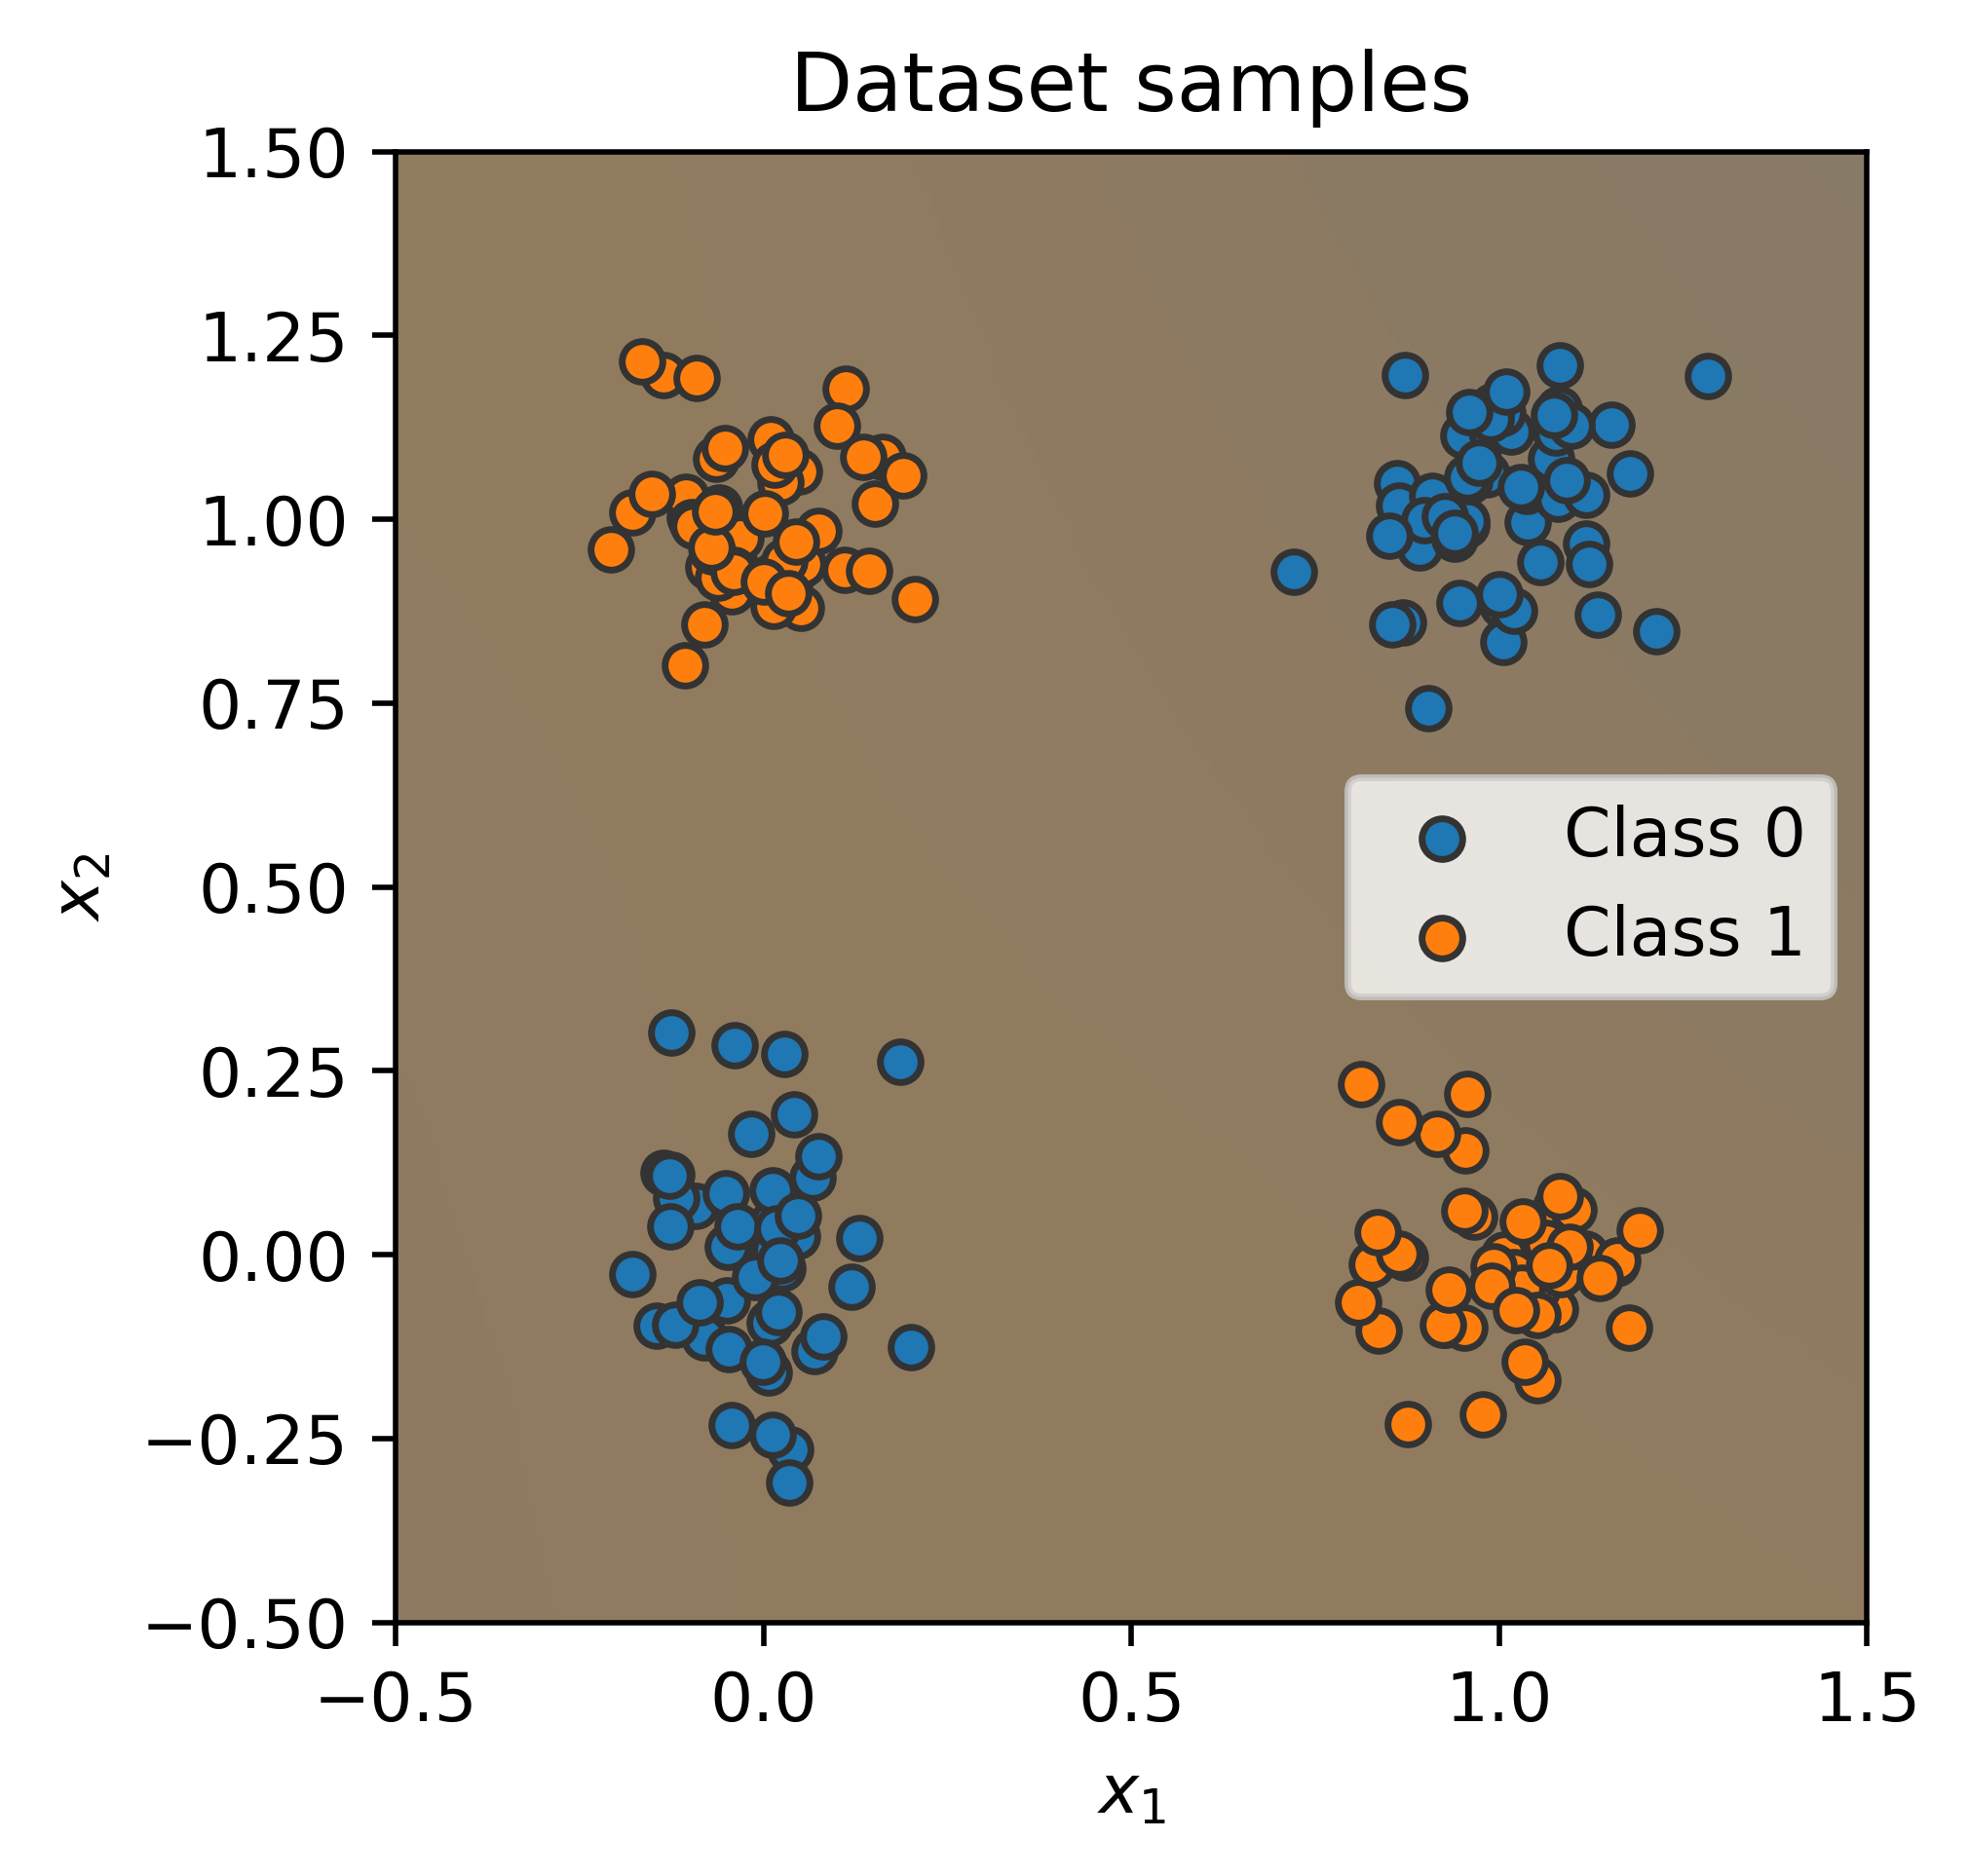

In [57]:
@torch.no_grad() # Decorator, same effect as "with torch.no_grad(): ..." over the whole function.
def visualize_classification(model, data, label):
    if isinstance(data, torch.Tensor):
        data = data.cpu().numpy()
    if isinstance(label, torch.Tensor):
        label = label.cpu().numpy()
    data_0 = data[label == 0]
    data_1 = data[label == 1]

    fig = plt.figure(figsize=(4,4))
    plt.scatter(data_0[:,0], data_0[:,1], edgecolor="#333", label="Class 0")
    plt.scatter(data_1[:,0], data_1[:,1], edgecolor="#333", label="Class 1")
    plt.title("Dataset samples")
    plt.ylabel(r"$x_2$")
    plt.xlabel(r"$x_1$")
    plt.legend()

    # Let's make use of a lot of operations we have learned above
#     model.to(device)
    c0 = torch.Tensor(to_rgba("C0"))
    c1 = torch.Tensor(to_rgba("C1"))
    x1 = torch.arange(-0.5, 1.5, step=0.01)
    x2 = torch.arange(-0.5, 1.5, step=0.01)
    xx1, xx2 = torch.meshgrid(x1, x2)  # Meshgrid function as in numpy
    model_inputs = torch.stack([xx1, xx2], dim=-1)
    preds = model(model_inputs)
    preds = torch.sigmoid(preds)
    output_image = (1 - preds) * c0[None,None] + preds * c1[None,None]  # Specifying "None" in a dimension creates a new one
    output_image = output_image.cpu().numpy()  # Convert to numpy array. This only works for tensors on CPU, hence first push to CPU
    plt.imshow(output_image, origin='lower', extent=(-0.5, 1.5, -0.5, 1.5))
    plt.grid(False)
    return fig

_ = visualize_classification(model, dataset.data, dataset.label)
plt.show()

In [74]:
# Import tensorboard logger from PyTorch
from torch.utils.tensorboard import SummaryWriter

# Load tensorboard extension for Jupyter Notebook, only need to start TB in the notebook
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [97]:
def train_model_with_logger(model, optimizer, data_loader, loss_module, val_dataset, num_epochs=100, logging_dir='runs/our_experiment'):
    # Create TensorBoard logger
    writer = SummaryWriter(logging_dir)
    model_plotted = False

    # Set model to train mode
    model.train()

    # Training loop
    for epoch in tqdm(range(num_epochs)):
        epoch_loss = 0.0
        for data_inputs, data_labels in data_loader:

            ## Step 1: Move input data to device (only strictly necessary if we use GPU)
#             data_inputs = data_inputs.to(device)
#             data_labels = data_labels.to(device)

            # For the very first batch, we visualize the computation graph in TensorBoard
            if not model_plotted:
                writer.add_graph(model, data_inputs)
                model_plotted = True

            ## Step 2: Run the model on the input data
            preds = model(data_inputs)
            preds = preds.squeeze(dim=1) # Output is [Batch size, 1], but we want [Batch size]

            ## Step 3: Calculate the loss
            loss = loss_module(preds, data_labels.float())

            ## Step 4: Perform backpropagation
            # Before calculating the gradients, we need to ensure that they are all zero.
            # The gradients would not be overwritten, but actually added to the existing ones.
            optimizer.zero_grad()
            # Perform backpropagation
            loss.backward()

            ## Step 5: Update the parameters
            optimizer.step()

            ## Step 6: Take the running average of the loss
            epoch_loss += loss.item()

        # Add average loss to TensorBoard
        epoch_loss /= len(data_loader)
        writer.add_scalar('training_loss',
                          epoch_loss,
                          global_step = epoch + 1)

        # Visualize prediction and add figure to TensorBoard
        # Since matplotlib figures can be slow in rendering, we only do it every 10th epoch
        if (epoch + 1) % 10 == 0:
            fig = visualize_classification(model, val_dataset.data, val_dataset.label)
            writer.add_figure('predictions',
                              fig,
                              global_step = epoch + 1)

    writer.close()

In [98]:
model = SimpleClassifier(num_inputs=2, num_hidden=4, num_outputs=1)
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)
train_model_with_logger(model, optimizer, train_data_loader, loss_module, val_dataset=dataset)

100%|█████████████████████████████████████████████████████████████| 100/100 [00:05<00:00, 16.74it/s]


In [65]:
import os

In [103]:
%tensorboard --logdir /Users/jaguar/runs/our_experiment

ERROR: Could not find '/path/to/envs/my_env/bin/tensorboard' (set by
the `TENSORBOARD_BINARY` environment variable). Please ensure that
your PATH contains an executable `tensorboard` program, or explicitly
specify the path to a TensorBoard binary by setting the
`TENSORBOARD_BINARY` environment variable.

## tensorboard can be run on terminal, go to terminal activate the conda env i.e. here torch-nightly and then write the above command 